# Práctica 1.3. 

#### Filtros para series temporales

In [2]:
import numpy as np
np.random.seed(0)
t = np.linspace(0, 5, 100)
x = np.sin(t) + .1 * np.random.normal(size=100)

#### Apply moving averge filters

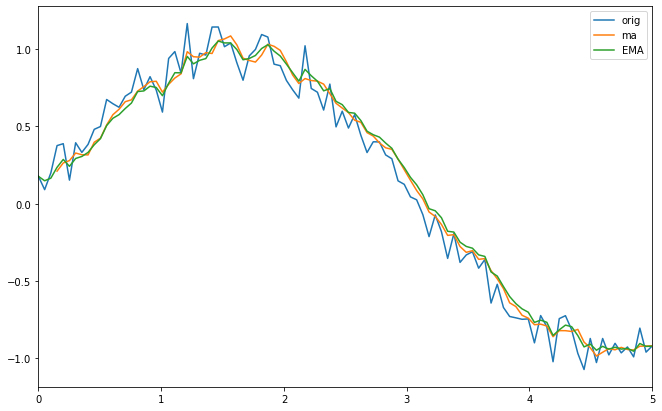

In [5]:
import pandas as pd

df = pd.DataFrame(x, index=t,columns=['orig'])
df['ma'] = df['orig'].rolling(window=4).mean()
df['EMA'] = df['orig'].ewm(span=5,adjust=False).mean()
df.plot(figsize=(11,7))

#### Apply a variety of turn-key filters to it, and plot the result

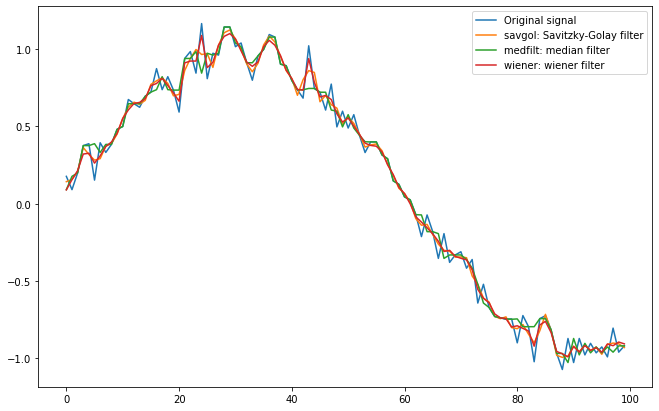

In [6]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(11, 7))
plt.plot(x, label='Original signal')

plt.plot(signal.savgol_filter(x,5,2), label='savgol: Savitzky-Golay filter')
plt.plot(signal.medfilt(x), label='medfilt: median filter')
plt.plot(signal.wiener(x), label='wiener: wiener filter')
plt.legend(loc='best')

# Analyze smoothing with another set of data

In [7]:
path = 'data/timeseries.csv'
df_timeseries = pd.read_csv(path, delimiter='\t',header=None)
df_timeseries.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.376936,1.224864,0.343874,0.328454,-0.337609,1.026514,-1.330996,-0.657800,1.446077,-0.846397,...,-1.568165,1.021863,-1.429748,1.356966,1.372781,0.663558,0.918346,-1.311742,-1.197146,1
1,0.644406,0.413269,-0.862278,-1.497386,-0.421458,-0.214215,-1.292131,0.956898,-1.216140,-0.588536,...,-0.802528,-1.121287,0.989319,-1.109687,0.219856,0.630034,1.398140,0.085742,0.024997,1
2,-0.978667,-0.406232,0.822429,-1.408242,-1.676734,-0.490632,1.404598,1.168600,-1.703254,0.972810,...,-0.762884,1.382972,-0.869103,1.277252,-0.198967,0.966809,0.666129,0.106996,0.082715,1
3,-0.236537,-0.098175,0.367092,1.366860,0.498281,-0.300223,1.715634,0.902108,-0.218132,-1.430721,...,-1.499604,0.406744,1.289153,-1.119731,-0.995985,1.651135,-1.187098,0.025463,-0.841518,1
4,1.490735,1.325243,1.626829,-0.317056,-1.098990,-0.022213,0.596980,1.667339,-0.206153,-1.376627,...,1.029995,-1.496161,-1.167442,1.484208,-0.373020,-0.843281,-0.209794,0.137724,0.716542,1


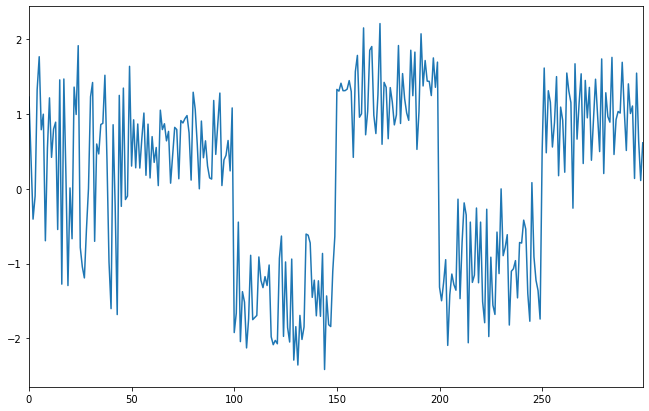

In [8]:
df_timeseries.iloc[:,1].plot(figsize=(11,7))

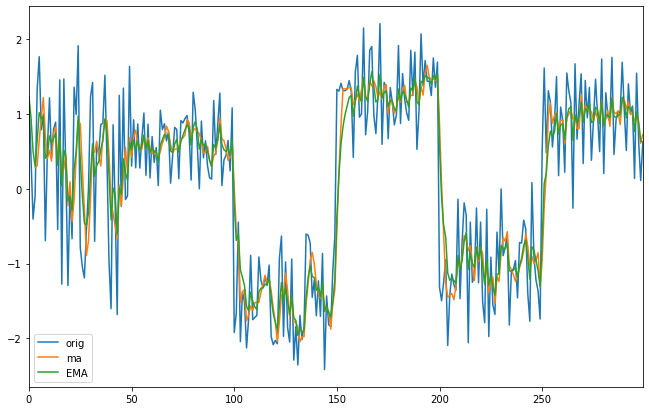

In [9]:
data=np.array(df_timeseries.iloc[:,1])

df2 = pd.DataFrame(data, columns=['orig'])
df2['ma'] = df2['orig'].rolling(window=4).mean()
df2['EMA'] = df2['orig'].ewm(span=5,adjust=False).mean()
df2.plot(figsize=(11,7))

# Reducción dimensional (PCA)
#### Reduce el espacio dimensional de los datos a 2 componentes y visualiza el resultado con un scatter plot y el histograma de las dos componentes. Extrae la varianza explicada "explained_variance_ratio_"

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_timeseries)

PCA(copy=True, n_components=2, whiten=False)

df = pca.transform(df_timeseries)

df_2d = pd.DataFrame(df)

df_2d.index = df_timeseries.index

df_2d.columns = ['PC1', 'PC2']

df_2d.head()


,PC1,PC2
0,0.097050,2.215184
1,1.097991,1.348673
2,1.360891,0.997681
3,-0.413974,2.280618
4,-0.919514,2.099876


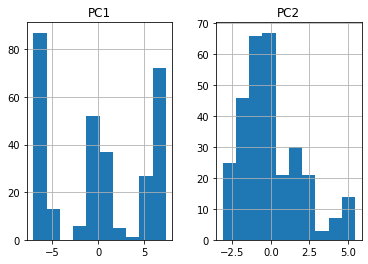

In [11]:
import matplotlib.pyplot as plt
df_2d.hist()
plt.show()

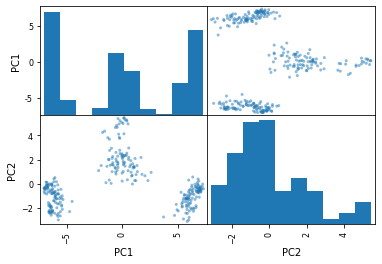

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_2d)
plt.show()

#### Normaliza los datos con MinMax, Standard y Robust
#### Vuelve a realizar el PCA para cada normalización, sale lo mismo?

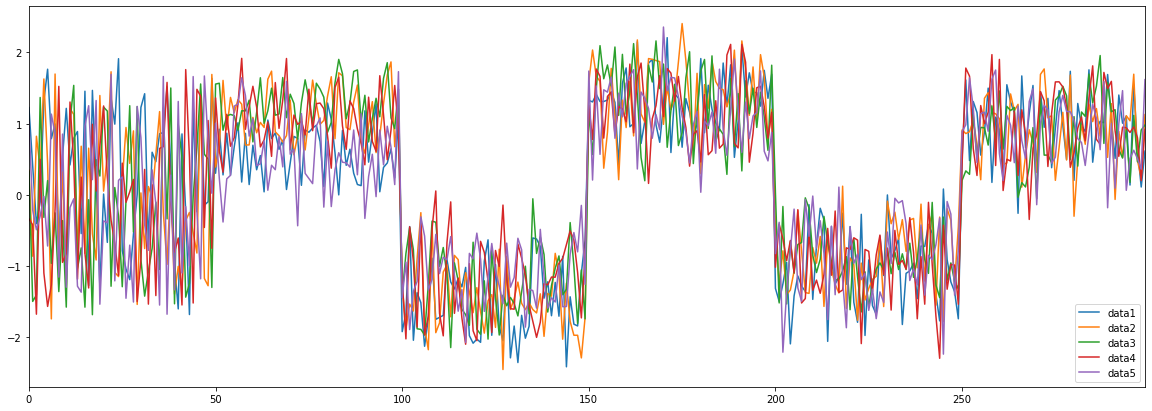

In [13]:
data1=df_timeseries.iloc[:,1]
data2=df_timeseries.iloc[:,2]
data3=df_timeseries.iloc[:,3]
data4=df_timeseries.iloc[:,4]
data5=df_timeseries.iloc[:,5]

df = pd.DataFrame()
df['data1'] = data1
df['data2'] = data2
df['data3'] = data3
df['data4'] = data4
df['data5'] = data5

df.plot(figsize=(20,7))

# Varianza explicada

## MinMax

In [14]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df['data1_mms'] = mms.fit_transform(df[['data1']])
df['data2_mms'] = mms.fit_transform(df[['data2']])
df['data3_mms'] = mms.fit_transform(df[['data3']])
df['data4_mms'] = mms.fit_transform(df[['data4']])
df['data5_mms'] = mms.fit_transform(df[['data5']])


(-2, 2)

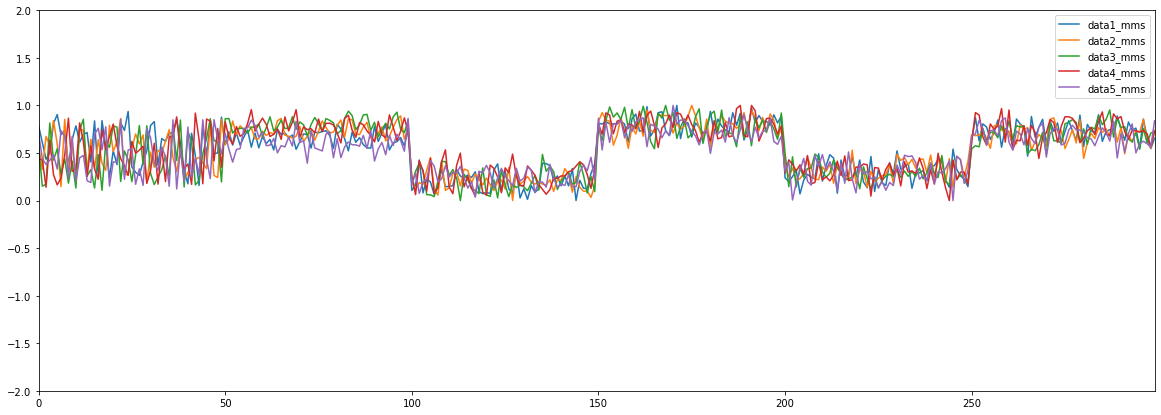

In [15]:
df[['data1_mms','data2_mms','data3_mms','data4_mms','data5_mms']].plot(figsize=(20,7))
plt.ylim(-2,2)

In [16]:
df_PCA=df[['data1_mms','data2_mms','data3_mms','data4_mms','data5_mms']]

pca = PCA(n_components = 2)
pca.fit(df_PCA)

PCA(copy=True, n_components=2, whiten=False)

df_t = pca.transform(df_PCA)

df_2d = pd.DataFrame(df_t)

df_2d.index = df_PCA.index

df_2d.columns = ['PC1', 'PC2']

df_2d.head()

,PC1,PC2
0,-0.168329,0.281329
1,0.343152,0.225989
2,0.409705,0.254952
3,-0.139328,-0.206982
4,-0.055564,0.366369


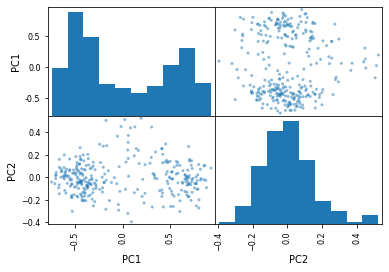

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_2d)
plt.show()

## Standard

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df['data1_zscore'] = ss.fit_transform(df[['data1']])
df['data2_zscore'] = ss.fit_transform(df[['data2']])
df['data3_zscore'] = ss.fit_transform(df[['data3']])
df['data4_zscore'] = ss.fit_transform(df[['data4']])
df['data5_zscore'] = ss.fit_transform(df[['data5']])

(-2, 2)

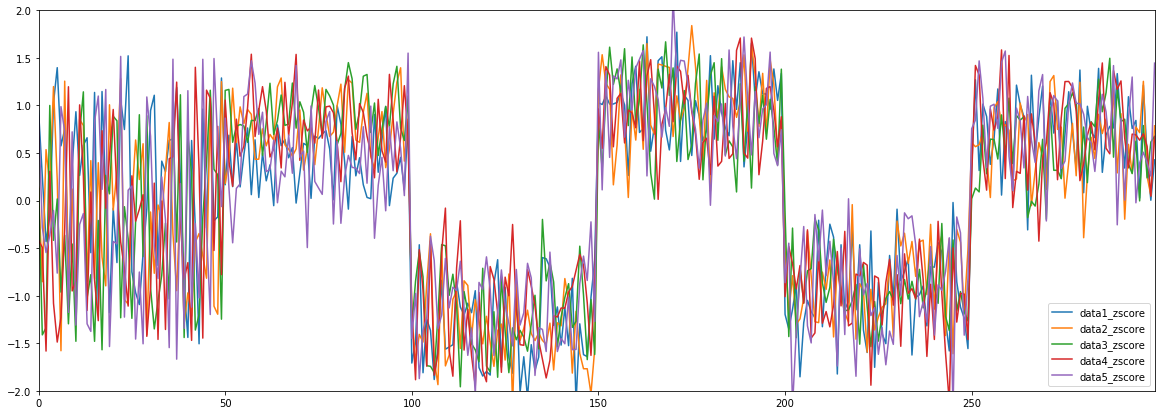

In [19]:
df[['data1_zscore','data2_zscore','data3_zscore','data4_zscore','data5_zscore']].plot(figsize=(20,7))
plt.ylim(-2,2)

In [20]:
df_PCA=df[['data1_zscore','data2_zscore','data3_zscore','data4_zscore','data5_zscore']]

pca = PCA(n_components = 2)
pca.fit(df_PCA)

PCA(copy=True, n_components=2, whiten=False)

df_t = pca.transform(df_PCA)

df_2d = pd.DataFrame(df_t)

df_2d.index = df_PCA.index

df_2d.columns = ['PC1', 'PC2']

df_2d.head()

,PC1,PC2
0,-0.735321,1.080652
1,1.262609,0.624670
2,1.495259,0.632792
3,-0.430081,-0.762344
4,-0.288715,0.736549


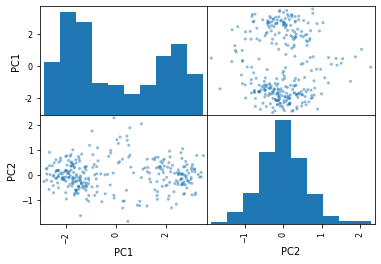

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_2d)
plt.show()

## Robust

In [22]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

df['data1_robust'] = rs.fit_transform(df[['data1']])
df['data2_robust'] = rs.fit_transform(df[['data2']])
df['data3_robust'] = rs.fit_transform(df[['data3']])
df['data4_robust'] = rs.fit_transform(df[['data4']])
df['data5_robust'] = rs.fit_transform(df[['data5']])

(-2, 2)

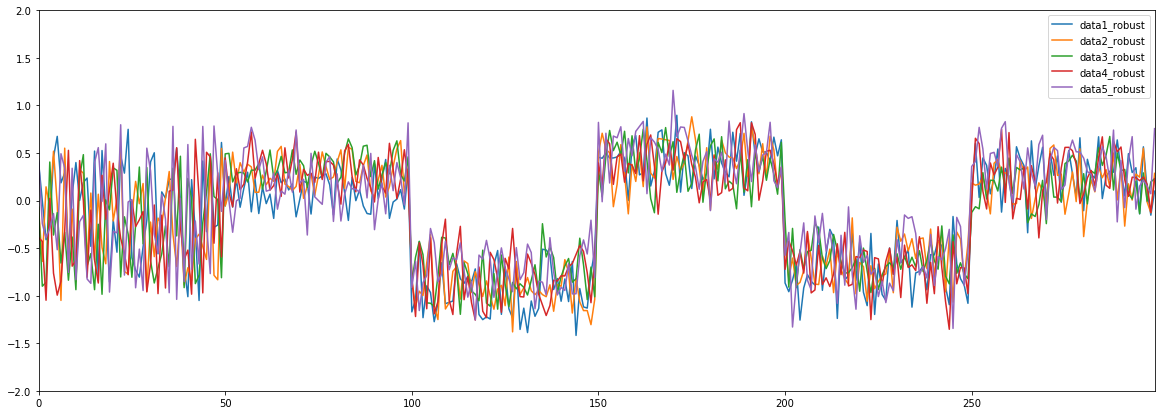

In [23]:
df[['data1_robust','data2_robust','data3_robust','data4_robust','data5_robust']].plot(figsize=(20,7))
plt.ylim(-2,2)

In [24]:
df_PCA=df[['data1_robust','data2_robust','data3_robust','data4_robust','data5_robust']]

pca = PCA(n_components = 2)
pca.fit(df_PCA)

PCA(copy=True, n_components=2, whiten=False)

df_t = pca.transform(df_PCA)

df_2d = pd.DataFrame(df_t)

df_2d.index = df_PCA.index

df_2d.columns = ['PC1', 'PC2']

df_2d.head()

,PC1,PC2
0,-0.445804,0.625133
1,0.672619,0.357398
2,0.829509,0.346550
3,-0.210174,-0.424219
4,-0.197781,0.419726


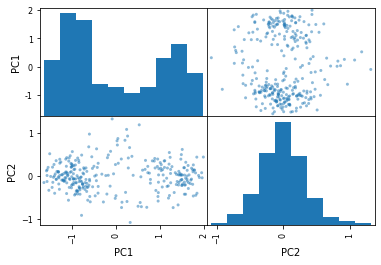

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_2d)
plt.show()